In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

### Importing file

In [2]:
file = pd.read_csv("C:\\Users\\mjjyo\\OneDrive\\Desktop\\london.csv")

In [3]:
file

,rental_id,duration,bike_id,end_rental_date_time,end_station_id,end_station_name,start_rental_date_time,start_station_id,start_station_name
0,61343322,60.0,12871.0,2016-12-28 00:01:00,660.0,"West Kensington Station, West Kensington",2016-12-28 00:00:00,633,"Vereker Road North, West Kensington"
1,61343321,300.0,2837.0,2016-12-28 00:05:00,763.0,"Mile End Park Leisure Centre, Mile End",2016-12-28 00:00:00,531,"Twig Folly Bridge, Mile End"
2,61343323,360.0,1269.0,2016-12-28 00:06:00,99.0,"Old Quebec Street, Marylebone",2016-12-28 00:00:00,116,"Little Argyll Street, West End"
3,61343325,1140.0,4208.0,2016-12-28 00:20:00,468.0,"Cantrell Road, Bow",2016-12-28 00:01:00,443,"Philpot Street, Whitechapel"
4,61343324,NaN,1406.0,NaN,NaN,NaN,2016-12-28 00:01:00,319,"Baldwin Street, St. Luke's"
...,...,...,...,...,...,...,...,...,...
38215555,101367955,240.0,15436.0,2020-09-01 23:53:00,652.0,"Evesham Street, Avondale",2020-09-01 23:49:00,606,"Addison Road, Holland Park"
38215556,101367958,60.0,10896.0,2020-09-01 23:51:00,488.0,"Reardon Street, Wapping",2020-09-01 23:50:00,458,"Wapping Lane, Wapping"
38215557,101367970,480.0,18116.0,2020-09-01 23:59:00,442.0,"Walmer Road, Avondale",2020-09-01 23:51:00,442,"Walmer Road, Avondale"
38215558,101367999,300.0,16371.0,2020-09-01 23:59:00,511.0,"Sutton Street, Shadwell",2020-09-01 23:54:00,202,"Leman Street, Aldgate"


In [4]:
# Convert date columns to datetime format
file['start_rental_date_time'] = pd.to_datetime(file['start_rental_date_time'])
file['end_rental_date_time'] = pd.to_datetime(file['end_rental_date_time'])

#### Sort data by each station's rides per day

In [5]:
# Group dataset by date and station
rides_per_day = file.groupby([file['end_rental_date_time'].dt.date, 'start_station_name']).size().reset_index(name='rides_count')

In [6]:
rides_per_day

,end_rental_date_time,start_station_name,rides_count
0,2016-12-28,"Abbey Orchard Street, Westminster",19
1,2016-12-28,"Abbotsbury Road, Holland Park",9
2,2016-12-28,"Aberdeen Place, St. John's Wood",8
3,2016-12-28,"Abingdon Green, Westminster",39
4,2016-12-28,"Abingdon Villas, Kensington",10
...,...,...,...
1044680,2020-09-01,"Wren Street, Holborn",33
1044681,2020-09-01,"Wright's Lane, Kensington",66
1044682,2020-09-01,"Wynne Road, Stockwell",12
1044683,2020-09-01,"York Hall, Bethnal Green",39


Want to calculate difference between average and the actual to identify outliers. Therefore, must create the average rides per day for each location.

In [7]:
# Calculate average rides per day for each station
average_rides = rides_per_day.groupby('start_station_name')['rides_count'].mean().reset_index(name='average_rides')

In [8]:
average_rides

,start_station_name,average_rides
0,"Abbey Orchard Street, Westminster",42.817774
1,"Abbotsbury Road, Holland Park",13.040816
2,"Aberdeen Place, St. John's Wood",20.044676
3,"Aberfeldy Street, Poplar",7.011381
4,"Abingdon Green, Westminster",53.360421
...,...,...
834,"Wright's Lane, Kensington",50.958302
835,"Wynne Road, Stockwell",13.674893
836,"York Hall, Bethnal Green",43.179315
837,"York Way, Camden",1.000000


In [9]:
# Merge average rides with the daily ride counts dataset
rides_per_day = pd.merge(rides_per_day, average_rides, on='start_station_name')

In [10]:
# Calculate the difference between actual ride counts and average rides per day
rides_per_day['rides_diff'] = rides_per_day['rides_count'] - rides_per_day['average_rides']

Negative implies there is less than average, positive implies more than average.

In [11]:
rides_per_day

,end_rental_date_time,start_station_name,rides_count,average_rides,rides_diff
0,2016-12-28,"Abbey Orchard Street, Westminster",19,42.817774,-23.817774
1,2016-12-29,"Abbey Orchard Street, Westminster",34,42.817774,-8.817774
2,2016-12-30,"Abbey Orchard Street, Westminster",21,42.817774,-21.817774
3,2016-12-31,"Abbey Orchard Street, Westminster",27,42.817774,-15.817774
4,2017-01-01,"Abbey Orchard Street, Westminster",38,42.817774,-4.817774
...,...,...,...,...,...
1044680,2020-08-28,"Exhibition Road Museums 2, South Kensington",28,34.142857,-6.142857
1044681,2020-08-29,"Exhibition Road Museums 2, South Kensington",20,34.142857,-14.142857
1044682,2020-08-30,"Exhibition Road Museums 2, South Kensington",24,34.142857,-10.142857
1044683,2020-08-31,"Exhibition Road Museums 2, South Kensington",27,34.142857,-7.142857


### Anomaly detection
* Want to find out which days are abnormally low and which days are abnormally high
* Identify the anomalies using the rides_diff column

In [12]:
# Select relevant features for anomaly detection
features = ['rides_diff']

In [13]:
# Train the anomaly detection model
model = IsolationForest(contamination=0.01)  # Adjust the contamination parameter as needed
model.fit(rides_per_day[features])

C:\Users\mjjyo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01)

In [14]:
# Predict anomalies
predictions = model.predict(rides_per_day[features])

In [15]:
# Add anomaly predictions to the rides_per_day dataframe
rides_per_day['anomaly_label'] = predictions

If the anomaly label is -1, it is an anomaly. 1 implies this is normal behavior.

In [16]:
rides_per_day

,end_rental_date_time,start_station_name,rides_count,average_rides,rides_diff,anomaly_label
0,2016-12-28,"Abbey Orchard Street, Westminster",19,42.817774,-23.817774,1
1,2016-12-29,"Abbey Orchard Street, Westminster",34,42.817774,-8.817774,1
2,2016-12-30,"Abbey Orchard Street, Westminster",21,42.817774,-21.817774,1
3,2016-12-31,"Abbey Orchard Street, Westminster",27,42.817774,-15.817774,1
4,2017-01-01,"Abbey Orchard Street, Westminster",38,42.817774,-4.817774,1
...,...,...,...,...,...,...
1044680,2020-08-28,"Exhibition Road Museums 2, South Kensington",28,34.142857,-6.142857,1
1044681,2020-08-29,"Exhibition Road Museums 2, South Kensington",20,34.142857,-14.142857,1
1044682,2020-08-30,"Exhibition Road Museums 2, South Kensington",24,34.142857,-10.142857,1
1044683,2020-08-31,"Exhibition Road Museums 2, South Kensington",27,34.142857,-7.142857,1


Test to see its effectiveness

In [17]:
# View the anomalies for the specific station
station_name = 'Abbey Orchard Street, Westminster'  # Replace with the desired station name
station_anomalies = rides_per_day[(rides_per_day['start_station_name'] == station_name) & (rides_per_day['anomaly_label'] == -1)]
station_anomalies

,end_rental_date_time,start_station_name,rides_count,average_rides,rides_diff,anomaly_label
727,2018-12-25,"Abbey Orchard Street, Westminster",192,42.817774,149.182226,-1


## Different type of Anomalies
* Positive anomaly: Much more rides than average on this day.
* Negative anomaly: Much less rides than average on this day.

In [77]:
# Filter and return the DataFrame of positive anomalies
positive_anomalies = rides_per_day[(rides_per_day['rides_diff'] > 0) & (rides_per_day['anomaly_label'] == -1)]
positive_anomalies

,end_rental_date_time,start_station_name,rides_count,average_rides,rides_diff,anomaly_label
727,2018-12-25,"Abbey Orchard Street, Westminster",192,42.817774,149.182226,-1
4721,2018-12-25,"Abingdon Green, Westminster",227,53.360421,173.639579,-1
5082,2019-12-25,"Abingdon Green, Westminster",198,53.360421,144.639579,-1
5239,2020-05-30,"Abingdon Green, Westminster",166,53.360421,112.639579,-1
5240,2020-05-31,"Abingdon Green, Westminster",227,53.360421,173.639579,-1
...,...,...,...,...,...,...
1044429,2020-05-31,"Queensway, Kensington Gardens",207,92.434343,114.565657,-1
1044442,2020-06-13,"Queensway, Kensington Gardens",520,92.434343,427.565657,-1
1044443,2020-06-14,"Queensway, Kensington Gardens",531,92.434343,438.565657,-1
1044452,2020-06-23,"Queensway, Kensington Gardens",224,92.434343,131.565657,-1


In [78]:
# Filter and return the DataFrame of negative anomalies
negative_anomalies = rides_per_day[(rides_per_day['rides_diff'] < 0) & (rides_per_day['anomaly_label'] == -1)]
negative_anomalies

,end_rental_date_time,start_station_name,rides_count,average_rides,rides_diff,anomaly_label
17382,2017-01-01,"Albert Gate, Hyde Park",38,159.143830,-121.143830,-1
17383,2017-01-02,"Albert Gate, Hyde Park",39,159.143830,-120.143830,-1
17384,2017-01-03,"Albert Gate, Hyde Park",53,159.143830,-106.143830,-1
17387,2017-01-06,"Albert Gate, Hyde Park",59,159.143830,-100.143830,-1
17391,2017-01-10,"Albert Gate, Hyde Park",60,159.143830,-99.143830,-1
...,...,...,...,...,...,...
1043129,2020-04-21,"Westminster Pier, Westminster",13,107.452888,-94.452888,-1
1043136,2020-04-28,"Westminster Pier, Westminster",11,107.452888,-96.452888,-1
1043137,2020-04-29,"Westminster Pier, Westminster",19,107.452888,-88.452888,-1
1044367,2020-03-30,"Queensway, Kensington Gardens",3,92.434343,-89.434343,-1


In [79]:
# Get ready to graph
import matplotlib.pyplot as plt

## Frequency
I have a list of all anomalies, but we must see if there are patterns. We do this by seeing the frequency of a certain day being an anomaly or not.

In [80]:
negative_anomalies['end_rental_date_time'] = pd.to_datetime(negative_anomalies['end_rental_date_time'])
# Filter the dataset to include only negative anomalies
negative_anomalies = negative_anomalies[(negative_anomalies['anomaly_label'] == -1) & (negative_anomalies['rides_diff'] < 0)]

# Group the negative anomalies by date and count the frequency
neg_anomaly_frequency = negative_anomalies['end_rental_date_time'].dt.date.value_counts().reset_index()
neg_anomaly_frequency.columns = ['Date', 'Frequency']

# Sort the anomalies DataFrame by frequency in descending order
neg_anomaly_frequency = neg_anomaly_frequency.sort_values(by='Frequency', ascending=False)

neg_anomaly_frequency

C:\Users\mjjyo\AppData\Local\Temp\ipykernel_26108\1296404784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_anomalies['end_rental_date_time'] = pd.to_datetime(negative_anomalies['end_rental_date_time'])


,Date,Frequency
0,2020-04-28,26
1,2020-03-30,21
2,2020-03-29,20
4,2020-02-16,20
3,2020-02-09,20
...,...,...
908,2017-08-03,1
907,2017-10-09,1
906,2018-06-07,1
905,2018-08-15,1


In [81]:
# Convert date columns to datetime format
positive_anomalies['end_rental_date_time'] = pd.to_datetime(positive_anomalies['end_rental_date_time'])

# Filter the dataset to include only positive anomalies
positive_anomalies = positive_anomalies[(positive_anomalies['anomaly_label'] == -1) & (positive_anomalies['rides_diff'] > 0)]

# Group the positive anomalies by date and count the frequency
pos_anomaly_frequency = positive_anomalies['end_rental_date_time'].dt.date.value_counts().reset_index()
pos_anomaly_frequency.columns = ['Date', 'Frequency']

# Sort the anomalies DataFrame by frequency in descending order
pos_anomaly_frequency = pos_anomaly_frequency.sort_values(by='Frequency', ascending=False)
pos_anomaly_frequency

C:\Users\mjjyo\AppData\Local\Temp\ipykernel_26108\856943590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_anomalies['end_rental_date_time'] = pd.to_datetime(positive_anomalies['end_rental_date_time'])


,Date,Frequency
0,2020-05-30,110
1,2020-05-25,104
2,2020-06-13,95
3,2020-05-31,94
4,2020-06-20,85
...,...,...
854,2020-01-10,1
855,2020-01-14,1
856,2020-01-24,1
857,2020-01-15,1


Example using pos_anomaly frequency. Christmas returns a lot of positive anomalies (2020 different due to the COVID-19 pandemic). 

In [82]:
pos_anomaly_frequency['Date'] = pd.to_datetime(pos_anomaly_frequency['Date'])
# Filter the DataFrame for Christmas
christmas_anomaly = pos_anomaly_frequency[pos_anomaly_frequency['Date'].dt.month == 12]
christmas_anomaly = christmas_anomaly[christmas_anomaly['Date'].dt.day == 25]
christmas_anomaly

,Date,Frequency
19,2018-12-25,36
30,2019-12-25,30
68,2017-12-25,17


### Graphing

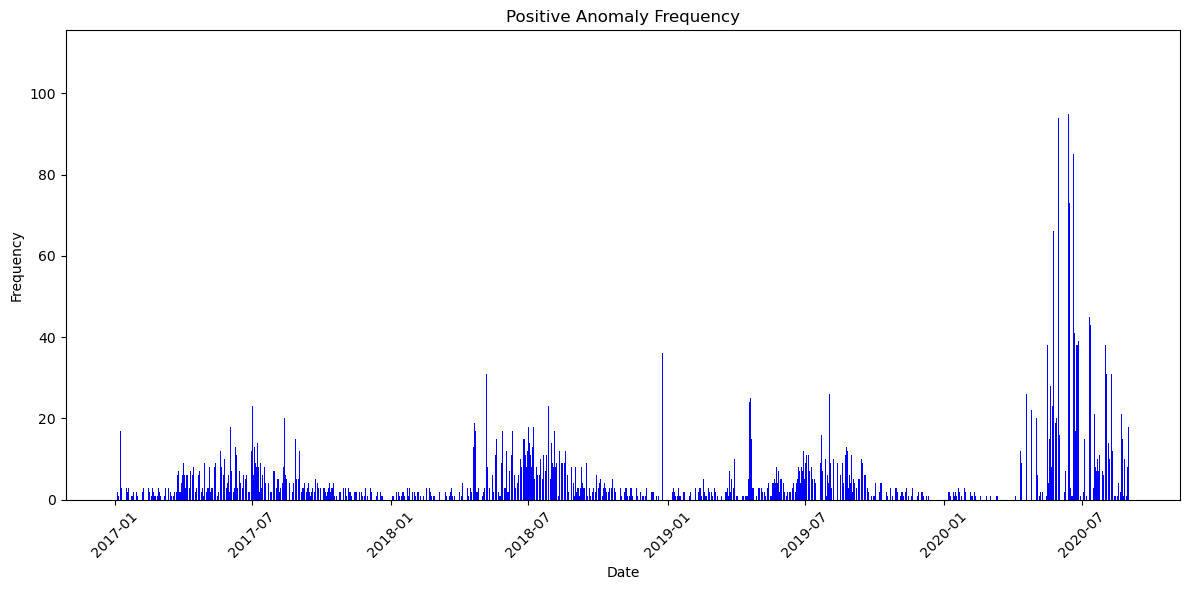

In [83]:
# Convert the 'Date' column to datetime format
pos_anomaly_frequency['Date'] = pd.to_datetime(pos_anomaly_frequency['Date'])

# Sort the DataFrame by date
pos_anomaly_frequency = pos_anomaly_frequency.sort_values(by='Date')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(pos_anomaly_frequency['Date'], pos_anomaly_frequency['Frequency'], color='blue')
plt.title('Positive Anomaly Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

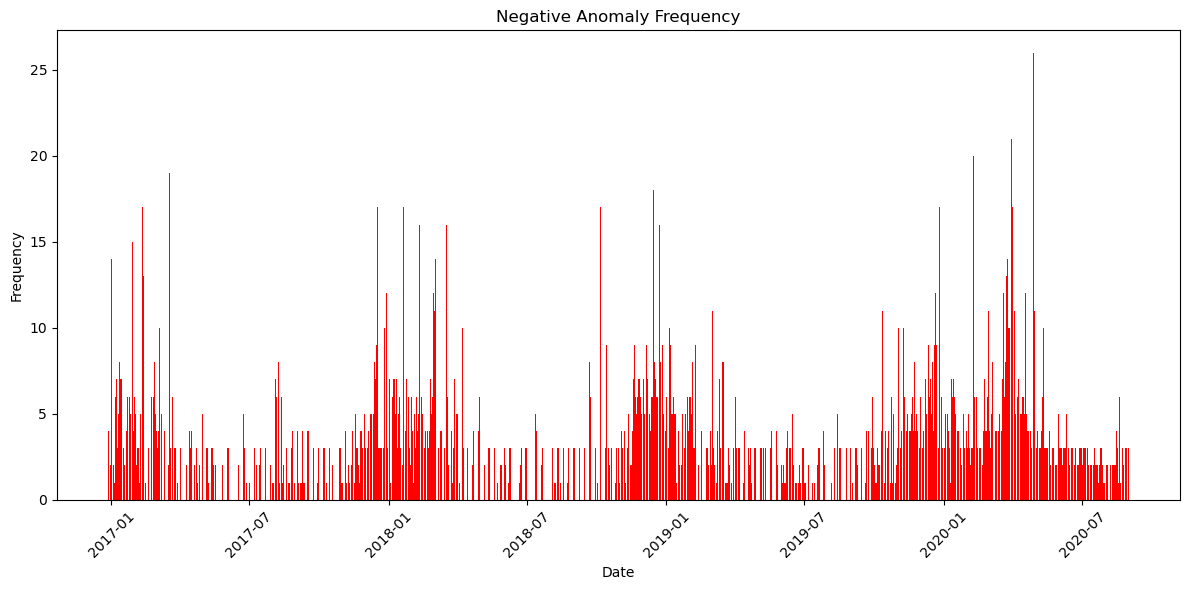

In [84]:
# Convert the 'Date' column to datetime format
neg_anomaly_frequency['Date'] = pd.to_datetime(neg_anomaly_frequency['Date'])

# Sort the DataFrame by date
neg_anomaly_frequency = neg_anomaly_frequency.sort_values(by='Date')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(neg_anomaly_frequency['Date'], neg_anomaly_frequency['Frequency'], color='red')
plt.title('Negative Anomaly Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## What we got:
* Understanding of anomaly patterns for positive and negative anomalies
* Generally, there are more positive anomalies during the summer and more negative anomalies during the winter
* However, this is not entirely helpful. These anomalies may just be due to the nature of seasons. We must find anomalies within these anomalies to find ones that are inconsistent with natural anomaly patterns

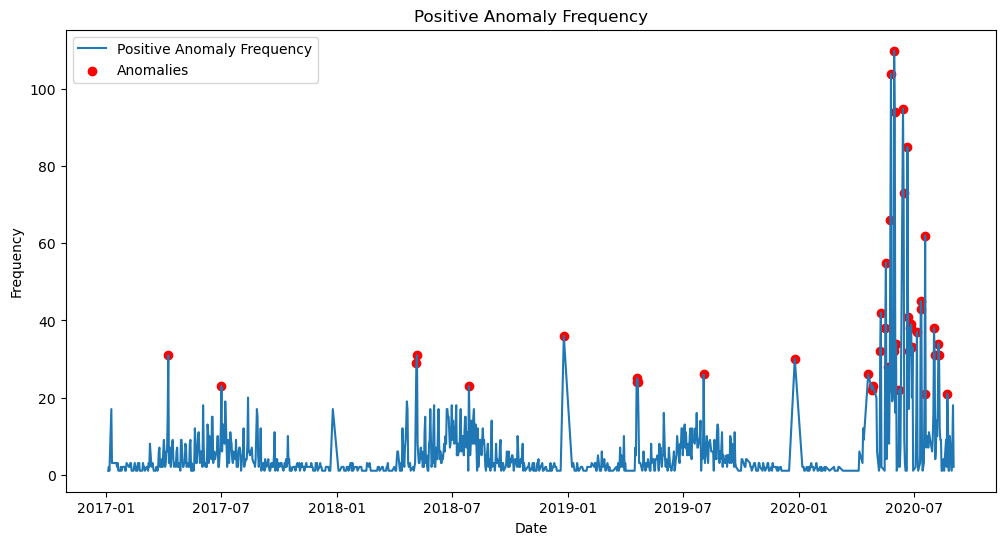

In [85]:
# Finding anomalies within anomalies on pos_anomaly_frequency

# Convert the 'Date' column to datetime format
pos_anomaly_frequency['Date'] = pd.to_datetime(pos_anomaly_frequency['Date'])

# Set the 'Date' column as the index
pos_anomaly_frequency = pos_anomaly_frequency.set_index('Date')

# Prepare the data for anomaly detection
X = np.array(pos_anomaly_frequency['Frequency']).reshape(-1, 1)

# Create an Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model and predict anomalies
model.fit(X)
anomaly_labels = model.predict(X)
anomalies = pos_anomaly_frequency[anomaly_labels == -1]

# Plot the original data and anomalies
plt.figure(figsize=(12, 6))
plt.plot(pos_anomaly_frequency.index, pos_anomaly_frequency['Frequency'], label='Positive Anomaly Frequency')
plt.scatter(anomalies.index, anomalies['Frequency'], color='red', label='Anomalies')
plt.title('Positive Anomaly Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Above shows days where it was uncharacteristic to have a lot of people using the bikeshare in London. This is important to understand what may draw more individuals to use this. It seems like Christmas is a big factor as well as the end of COVID-lockdowns in London. More research will have to be done into these anomalies to understand what was going on in London at these times.

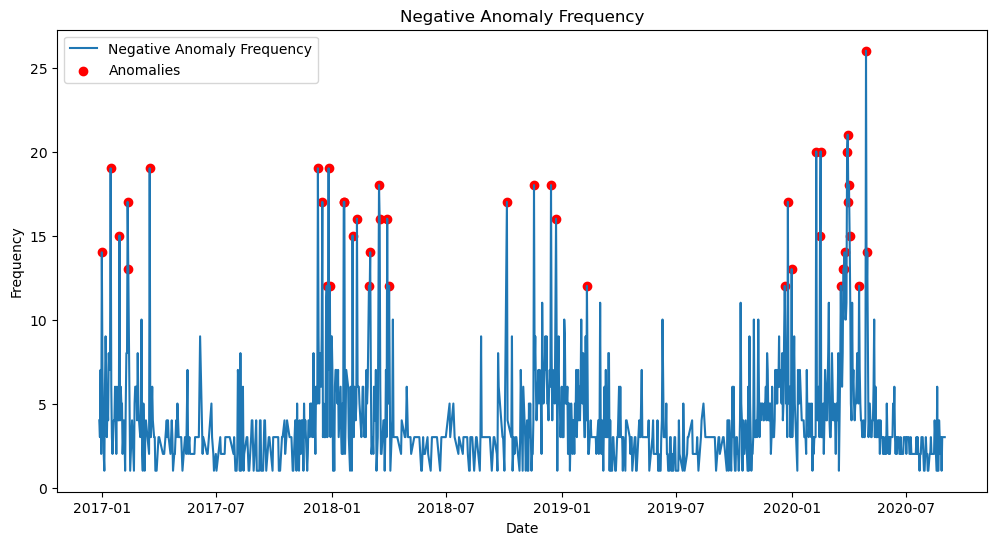

In [86]:
# Finding anomalies within anomalies on neg_anomaly_frequency

# Convert the 'Date' column to datetime format
neg_anomaly_frequency['Date'] = pd.to_datetime(neg_anomaly_frequency['Date'])

# Set the 'Date' column as the index
neg_anomaly_frequency = neg_anomaly_frequency.set_index('Date')

# Prepare the data for anomaly detection
X = np.array(neg_anomaly_frequency['Frequency']).reshape(-1, 1)

# Create an Isolation Forest model for anomaly detection
model = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed

# Fit the model and predict anomalies
model.fit(X)
anomaly_labels = model.predict(X)
anomalies = neg_anomaly_frequency[anomaly_labels == -1]

# Plot the original data and anomalies
plt.figure(figsize=(12, 6))
plt.plot(neg_anomaly_frequency.index, neg_anomaly_frequency['Frequency'], label='Negative Anomaly Frequency')
plt.scatter(anomalies.index, anomalies['Frequency'], color='red', label='Anomalies')
plt.title('Negative Anomaly Frequency')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Above shows days in which it was uncharacteristic to have that many people not using bikeshare. This could signal to problems within the city and/or bikeshare problems themselves. However, the data that is not highlighted is still helpful. The days that are very low still may highlight individual errors, such as necessary repairs